# **Convolutional Neural Network (CNN) with Advanced Architectures**

 *Objective: Construct and evaluate a CNN with advanced architectural components for image classification tasks*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-10-01 13:30:56.700034: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-01 13:30:57.436191: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## **Load Dataset MNIST and Data Augment**

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, Testing labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Testing data shape: (10000, 28, 28), Testing labels shape: (10000,)


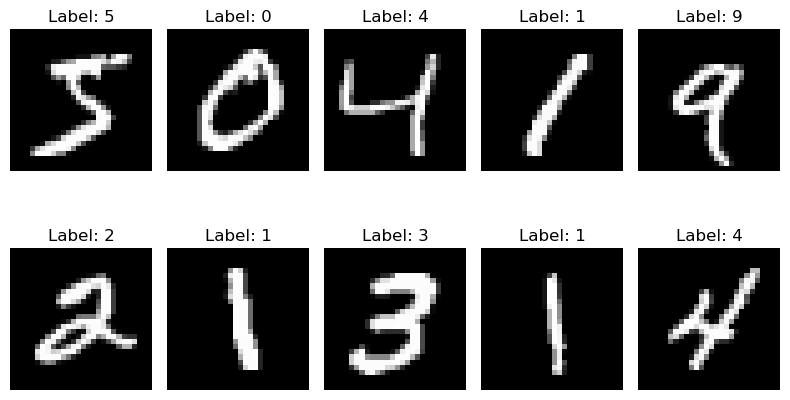

In [3]:
plt.figure(figsize=(8, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


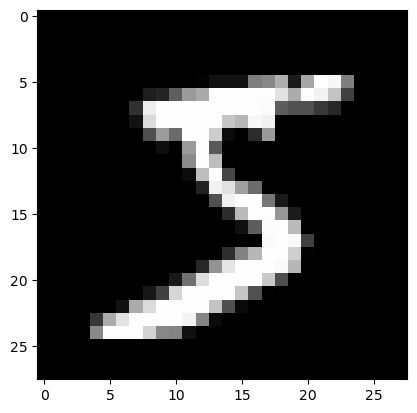

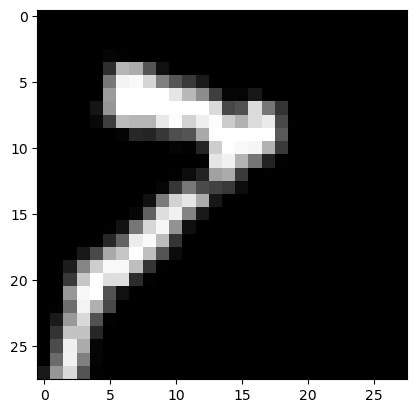

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


datagen = ImageDataGenerator(
    rotation_range=20,       # rotations
    width_shift_range=0.2,   # Hshifts
    height_shift_range=0.2,  # Vshifts
    shear_range=0.2,         # Shear
    zoom_range=0.2,          # Zoom
    horizontal_flip=True,    # Horizontal flips
    fill_mode='nearest'      # Fill mode for new pixels
)

datagen.fit(x_train)

# Visual Augmentation
sample = x_train[0].reshape(28, 28)
plt.imshow(sample, cmap='gray')
plt.show()

for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=1):
    augmented_image = X_batch[0].reshape(28, 28)
    plt.imshow(augmented_image, cmap='gray')
    plt.show()
    break

## **CNN Architecture**

In [5]:
def create_advanced_cnn(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.25))

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

advanced_model = create_advanced_cnn()
advanced_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 


2024-10-01 13:31:14.481127: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 180 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:42:00.0, compute capability: 7.5
2024-10-01 13:31:14.499216: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:736] failed to allocate 180.81MiB (189595648 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-10-01 13:31:14.499331: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:736] failed to allocate 162.73MiB (170636288 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory


 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_2 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 batch_nor

In [6]:
def create_baseline_cnn(input_shape=(28, 28, 1), num_classes=10):
    baseline_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return baseline_model

baseline_model = create_baseline_cnn()
baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 3, 128)       

## **Training and Evaluation**

In [7]:
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
advanced_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

epochs = 20
batch_size = 64

# Train both models and compare
history_baseline = baseline_model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

history_advanced = advanced_model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/20


2024-10-01 13:31:41.641957: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-10-01 13:31:42.412944: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:429] Could not create cudnn handle: CUDNN_STATUS_ALLOC_FAILED
2024-10-01 13:31:42.413011: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at conv_ops_fused_impl.h:625 : UNIMPLEMENTED: DNN library is not found.
2024-10-01 13:31:42.413038: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:GPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): UNIMPLEMENTED: DNN library is not found.
	 [[{{node sequential_1/conv2d_6/Relu}}]]


UnimplementedError: Graph execution error:

Detected at node 'sequential_1/conv2d_6/Relu' defined at (most recent call last):
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
      app.start()
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 701, in start
      self.io_loop.start()
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in dispatch_queue
      await self.process_one()
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 523, in process_one
      await dispatch(*args)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 429, in dispatch_shell
      await result
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 767, in execute_request
      reply_content = await reply_content
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 429, in do_execute
      res = shell.run_cell(
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
      coro.send(None)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_35350/916678936.py", line 10, in <module>
      history_baseline = baseline_model.fit(
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/keras/engine/sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/keras/layers/convolutional/base_conv.py", line 321, in call
      return self.activation(outputs)
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/home/ppninja/miniconda3/envs/cs5821/lib/python3.10/site-packages/keras/backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential_1/conv2d_6/Relu'
DNN library is not found.
	 [[{{node sequential_1/conv2d_6/Relu}}]] [Op:__inference_train_function_2073]

## **Plot Results**

In [ ]:
def plot_training_curves(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(1, len(acc) + 1)
    plt.figure(figsize=(14, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

plot_training_curves(history_baseline, 'Baseline CNN')
plot_training_curves(history_advanced, 'Advanced CNN')


## **Compare models**

In [ ]:
# Evaluate Baseline Model
test_loss_baseline, test_acc_baseline = baseline_model.evaluate(x_test, y_test)
print(f'Baseline CNN Test Accuracy: {test_acc_baseline:.4f}, Test Loss: {test_loss_baseline:.4f}')

# Evaluate Advanced Model
test_loss_advanced, test_acc_advanced = advanced_model.evaluate(x_test, y_test)
print(f'Advanced CNN Test Accuracy: {test_acc_advanced:.4f}, Test Loss: {test_loss_advanced:.4f}')


In [ ]:
num_samples = 10
plt.figure(figsize=(7, 5))
for i in range(num_samples):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()